[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/187l1Oqf0hw9F-tNHDK-HNEWs0_vV3Gki#scrollTo=Cr7spcKsibDA)

In [17]:
!pip install scikit-learn
!pip install sklearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1310 sha256=4e442b07017fbe37ab2c7cfd7b28abd5f93ca9ef28784719d831639be3a6b4b7
  Stored in directory: /root/.cache/pip/wheels/46/ef/c3/157e41f5ee1372d1be90b09f74f82b10e391eaacca8f22d33e
Successfully built sklearn


In [18]:
# importing the required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [19]:
# mounting google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [20]:
# accessing the csv file from my google drive
path = "/content/drive/MyDrive/data/mnist_train.csv"
dataset = pd.read_csv(path)

In [21]:
dataset.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
# entering size of dataset 
data = dataset.values[:8700]
data.shape

(8700, 785)

In [23]:
X, Y = data[:, 1:], data[:, 0]

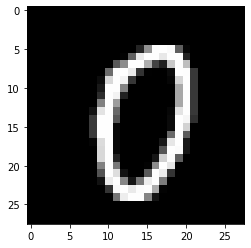

In [24]:
# Plotting digit
im = X[1000].reshape((28,28))
plt.figure()
plt.imshow(im, cmap='gray')

In [25]:
# splitting the dataset as 20 percent for testing
split = int(X.shape[0] * 0.20)
X_train, X_test, Y_train, Y_test = X[:split], X[split:], Y[:split], Y[split:]
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(1740, 784) (1740,)
(6960, 784) (6960,)


In [26]:
X_train = X_train.flatten().reshape(len(X_train),-1)
X_train = X_test.flatten().reshape(len(X_test),-1)

In [27]:
# using euclidean distance formula
def euclidean(a1, a2):    # we are using euclidean distance in KNN you canyou any other 
    return np.sqrt(np.sum((a1 - a2) ** 2))

In [28]:
# training knn
def knn(X_train, y_train, test_point, k=40):
    
    distances = []
    
    # 1) Compute distances using euclidean
    for data_point, label in zip(X_train, y_train):
        distance = euclidean(test_point, data_point)
        distances.append((distance, label))
        
    # 2) Sort distances on the basis of its distance
    distances = sorted(distances, key=lambda x: x[0])
    
    # 3) Choose k nearest neighbors in this case i have choosen its value to be 40 
    k_nearest_neighbors = np.array(distances[:k])  
    freq = np.unique(k_nearest_neighbors[:,1], return_counts=True)
    labels, counts = freq
    
    # 4) Decide (Majority Voting)
    verdict = labels[counts.argmax()]
    return verdict

In [29]:
# predicting the values
def get_predictions(X_train, y_train, X_test, k=40): 
    predictions = []
    
    for test_point in X_test:
        pred = knn(X_train, y_train, test_point, k)
        predictions.append(pred)
        
    return np.array(predictions)

In [47]:
# calculating accuracy
def calculate_accuracy(predictions, true_labels):          
    return (predictions == true_labels).sum() / true_labels.shape[0]
    predictions = get_predictions(X_train, Y_train, X_test, k=40)
    calculate_accuracy(predictions, Y_test)

In [33]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import neighbors
from sklearn.neighbors import KNeighborsClassifier

k = 40

knn = neighbors.KNeighborsClassifier(k, weights = 'uniform')
knn.fit(X_train , Y_test)
pred = knn.predict(X_train)

confusion = confusion_matrix(Y_test, pred)

report = classification_report(Y_test, pred)
print(report)
confusion

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       698
           1       0.81      0.99      0.89       793
           2       0.99      0.84      0.91       680
           3       0.92      0.90      0.91       716
           4       0.96      0.89      0.93       677
           5       0.94      0.89      0.91       594
           6       0.94      0.97      0.95       705
           7       0.93      0.93      0.93       735
           8       0.98      0.82      0.89       675
           9       0.85      0.94      0.89       687

    accuracy                           0.92      6960
   macro avg       0.93      0.92      0.92      6960
weighted avg       0.92      0.92      0.92      6960



array([[686,   1,   0,   0,   1,   2,   7,   0,   1,   0],
       [  0, 787,   1,   0,   1,   0,   0,   1,   1,   2],
       [  7,  59, 574,  10,   3,   1,   5,  12,   7,   2],
       [  3,  25,   2, 646,   2,  13,   3,  11,   2,   9],
       [  0,  21,   2,   0, 605,   0,   3,   3,   0,  43],
       [  3,  11,   0,  14,   4, 530,  15,   0,   2,  15],
       [  8,   7,   0,   0,   0,   4, 685,   1,   0,   0],
       [  0,  29,   1,   0,   4,   0,   0, 680,   0,  21],
       [  7,  30,   1,  29,   6,  15,  13,   4, 551,  19],
       [  3,   7,   0,   7,   5,   0,   1,  18,   0, 646]])